In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)


players <- read_csv("https://raw.githubusercontent.com/Parsa-Sha/DSCI_100_Project/refs/heads/main/data/players.csv") 
players
sessions <- read_csv("https://raw.githubusercontent.com/Parsa-Sha/DSCI_100_Project/refs/heads/main/data/sessions.csv")
sessions

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
⋮,⋮,⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,28/07/2024 15:36,28/07/2024 15:57,1.72218e+12,1.72218e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,25/07/2024 06:15,25/07/2024 06:22,1.72189e+12,1.72189e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,20/05/2024 02:26,20/05/2024 02:45,1.71617e+12,1.71617e+12


In [5]:
library(lubridate)

# sessions_tidy <- left_join(sessions, players) |>
#   mutate(
#     start_time = as.POSIXct(start_time, format = "%d/%m/%Y %H:%M"),
#     end_time   = as.POSIXct(end_time,   format = "%d/%m/%Y %H:%M"),

    
#     start_year  = year(start_time),
#     start_month = month(start_time),
#     start_day   = day(start_time),
#     start_hour  = hour(start_time),
#     start_min   = minute(start_time),

    
#     end_year  = year(end_time),
#     end_month = month(end_time),
#     end_day   = day(end_time),
#     end_hour  = hour(end_time),
#     end_min   = minute(end_time)
#   ) |>
#   select(
#     hashedEmail,
#     original_start_time,
#     original_end_time,
#     start_day, start_month, start_year, start_hour, start_min,
#     end_day, end_month, end_year, end_hour, end_min, played_hours, experience, Age, gender
#   ) |>
#     group_by(hashedEmail) |>
#     mutate(number_of_sessions = n())

# head(sessions_tidy)
# Calculate duration per session
sessions_tidy <- sessions %>%
  mutate(
    start_time = as.POSIXct(start_time, format = "%d/%m/%Y %H:%M"),
    end_time   = as.POSIXct(end_time, format = "%d/%m/%Y %H:%M"),
    session_duration = as.numeric(difftime(end_time, start_time, units = "mins"))
  )

# Summarize per user
sessions_summary <- sessions_tidy %>%
  group_by(hashedEmail) %>%
  summarise(
    total_session_duration_minutes = sum(session_duration, na.rm = TRUE),
    total_sessions = n()
  )

# Join with player data
player_data <- players %>%
  left_join(sessions_summary, by = "hashedEmail") %>%
  mutate(
    avg_session_duration = total_session_duration_minutes / total_sessions,
    avg_played_per_session = played_hours / total_sessions
  )
player_data

experience,subscribe,hashedEmail,played_hours,name,gender,Age,total_session_duration_minutes,total_sessions,avg_session_duration,avg_played_per_session
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,2019,27,74.77778,1.122222
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17,255,3,85.00000,1.266667
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17,5,1,5.00000,0.000000
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17,5,1,5.00000,0.0000000
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17,179,6,29.83333,0.3833333
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA,15,1,15.00000,0.2000000


In [16]:

# Filter for "Pro" experience group
pro_data <- player_data %>%
  filter(experience == "Pro") %>%
  mutate(
    gender_num = case_when(
      gender == "Male" ~ 0,
      gender == "Female" ~ 1,
      TRUE ~ NA_real_
    )
  ) %>%
  select(subscribe, Age, avg_session_duration, gender_num) %>%
  drop_na()

pro_data <- pro_data %>%
  mutate(subscribe = as.factor(subscribe))
pro_data

subscribe,Age,avg_session_duration,gender_num
<fct>,<dbl>,<dbl>,<dbl>
TRUE,9,74.77778,0
TRUE,17,35.00000,0
TRUE,17,16.00000,0
⋮,⋮,⋮,⋮
FALSE,21,30,0
FALSE,17,19,0
FALSE,17,110,0


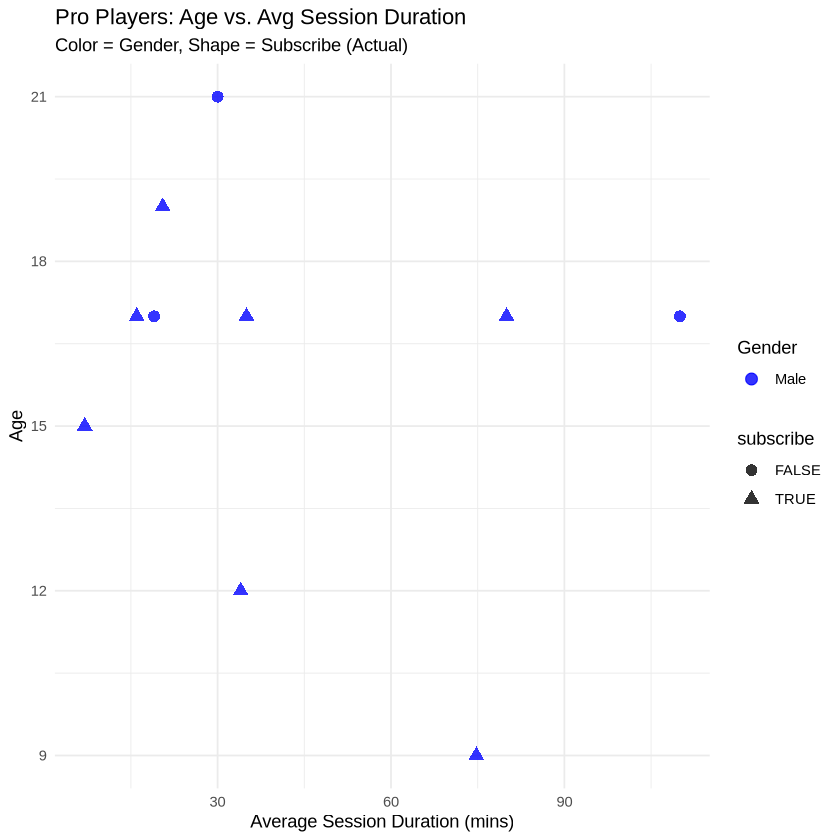

In [32]:
library(ggplot2)

ggplot(pro_data, aes(x = avg_session_duration, y = Age)) +
  geom_point(aes(
    color = factor(gender_num),  # 0 = Male, 1 = Female
    shape = subscribe
  ), size = 3, alpha = 0.8) +
  scale_color_manual(
    values = c("blue", "pink"),
    labels = c("Male", "Female"),
    name = "Gender"
  ) +
  labs(
    title = "Pro Players: Age vs. Avg Session Duration",
    subtitle = "Color = Gender, Shape = Subscribe (Actual)",
    x = "Average Session Duration (mins)",
    y = "Age"
  ) +
  theme_minimal()


In [17]:
set.seed(123)  # for reproducibility

pro_split <- initial_split(pro_data, prop = 0.8, strata = subscribe)
pro_train <- training(pro_split)
pro_test  <- testing(pro_split)


In [21]:
pro_recipe <- recipe(subscribe ~ Age + avg_session_duration + gender_num, data = pro_train) %>%
  step_zv(all_predictors()) %>%
  step_normalize(all_predictors())


In [22]:
knn_spec <- nearest_neighbor(neighbors = 5) %>%
  set_mode("classification") %>%
  set_engine("kknn")


In [23]:
knn_workflow <- workflow() %>%
  add_model(knn_spec) %>%
  add_recipe(pro_recipe)

knn_fit <- fit(knn_workflow, data = pro_train)


Warning message:
“5 samples were requested but there were 7 rows in the data. 2 will be used.”


In [24]:
pro_preds <- predict(knn_fit, pro_test) %>%
  bind_cols(pro_test)

# Evaluate with basic metrics
library(yardstick)
metrics(pro_preds, truth = subscribe, estimate = .pred_class)


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.6666667
kap,binary,0.0000000


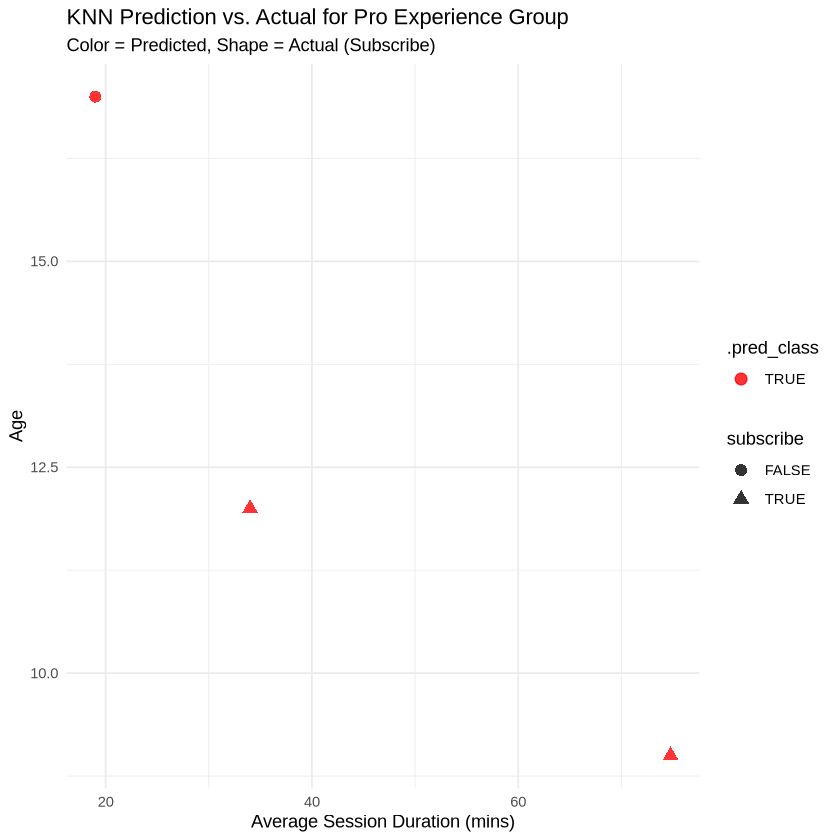

In [25]:
library(ggplot2)

ggplot(pro_preds, aes(x = avg_session_duration, y = Age)) +
  geom_point(aes(color = .pred_class, shape = subscribe), size = 3, alpha = 0.8) +
  scale_color_manual(values = c("red", "blue")) +
  labs(
    title = "KNN Prediction vs. Actual for Pro Experience Group",
    subtitle = "Color = Predicted, Shape = Actual (Subscribe)",
    x = "Average Session Duration (mins)",
    y = "Age"
  ) +
  theme_minimal()


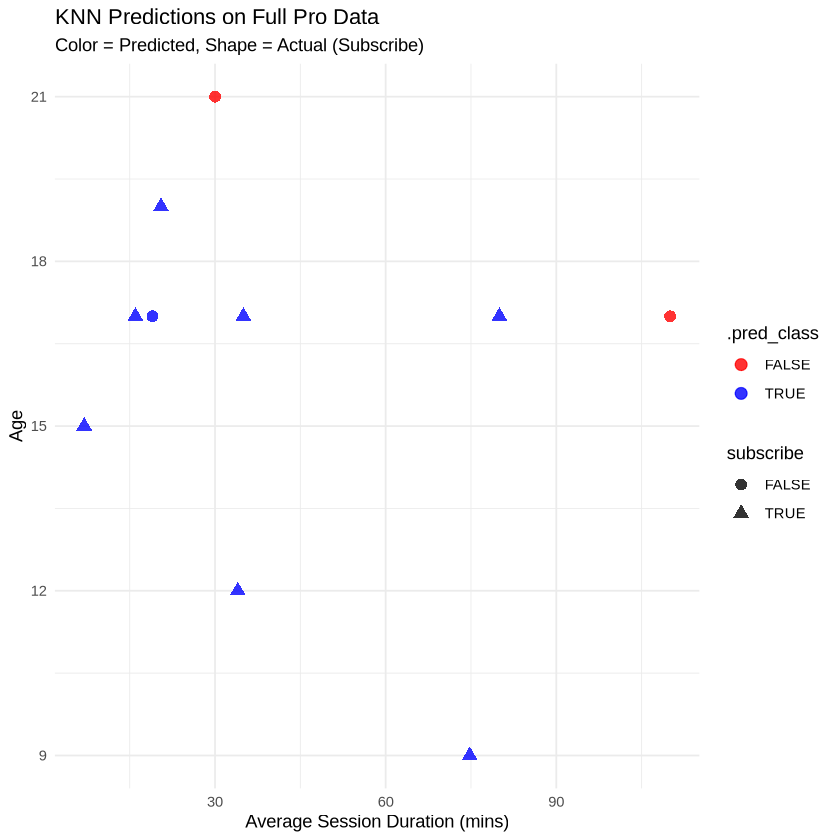

In [27]:
# Reuse recipe and workflow
all_preds <- predict(knn_fit, new_data = pro_data) %>%
  bind_cols(pro_data)
ggplot(all_preds, aes(x = avg_session_duration, y = Age)) +
  geom_point(aes(color = .pred_class, shape = subscribe), size = 3, alpha = 0.8) +
  scale_color_manual(values = c("red", "blue")) +
  labs(
    title = "KNN Predictions on Full Pro Data",
    subtitle = "Color = Predicted, Shape = Actual (Subscribe)",
    x = "Average Session Duration (mins)",
    y = "Age"
  ) +
  theme_minimal()


In [31]:
# Example new Pro player
new_player_known <- tibble(
  subscribe = as.factor(TRUE),     # this is the ground truth
  Age = 22,
  avg_session_duration = 45,
  gender_num = 0                   # male
)

# Preprocess the new player
# Prep the recipe if not already done
prepped_recipe <- prep(pro_recipe)

# Apply the same preprocessing to new player
new_player_baked <- bake(prepped_recipe, new_data = new_player_known)

new_player_pred <- predict(knn_fit, new_data = new_player_known) %>%
  bind_cols(new_player_known)
new_player_pred %>%
  select(subscribe, .pred_class)
new_player_pred %>%
  mutate(correct = subscribe == .pred_class)


subscribe,.pred_class
<fct>,<fct>
TRUE,FALSE


.pred_class,subscribe,Age,avg_session_duration,gender_num,correct
<fct>,<fct>,<dbl>,<dbl>,<dbl>,<lgl>
FALSE,TRUE,22,45,0,FALSE


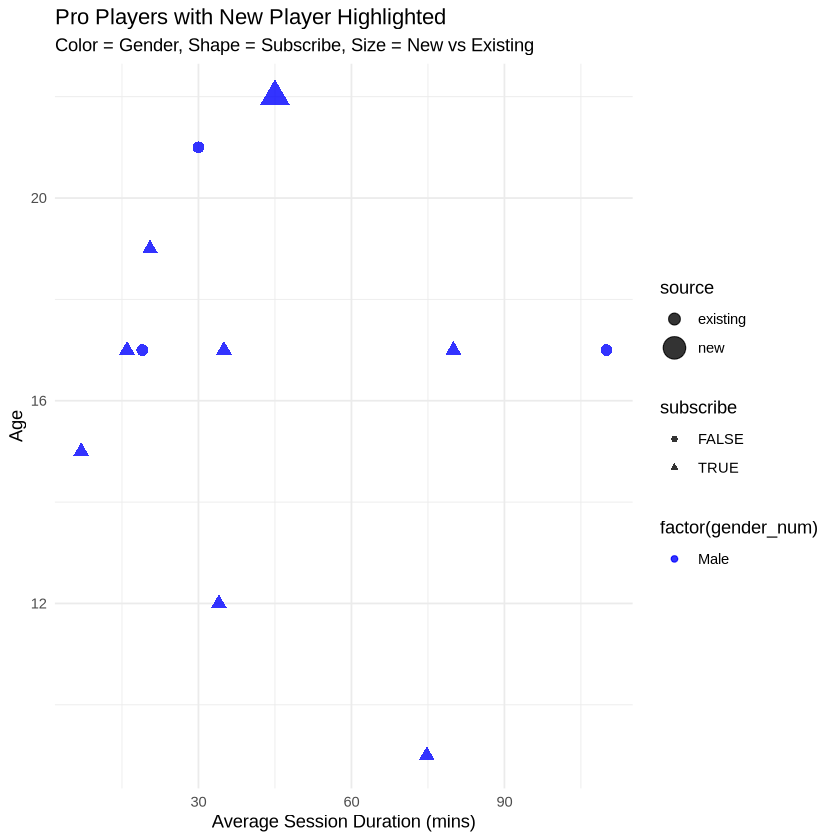

In [33]:
# Add a new row to the data (with a 'source' column)
pro_data_tagged <- pro_data %>%
  mutate(source = "existing")

new_player_known <- new_player_known %>%
  mutate(source = "new")

combined_data <- bind_rows(pro_data_tagged, new_player_known)

# Now plot with the new player highlighted
ggplot(combined_data, aes(x = avg_session_duration, y = Age)) +
  geom_point(aes(
    color = factor(gender_num),
    shape = subscribe,
    size = source
  ), alpha = 0.8) +
  scale_color_manual(values = c("blue", "pink"), labels = c("Male", "Female")) +
  scale_size_manual(values = c(existing = 3, new = 6)) +
  labs(
    title = "Pro Players with New Player Highlighted",
    subtitle = "Color = Gender, Shape = Subscribe, Size = New vs Existing",
    x = "Average Session Duration (mins)",
    y = "Age"
  ) +
  theme_minimal()


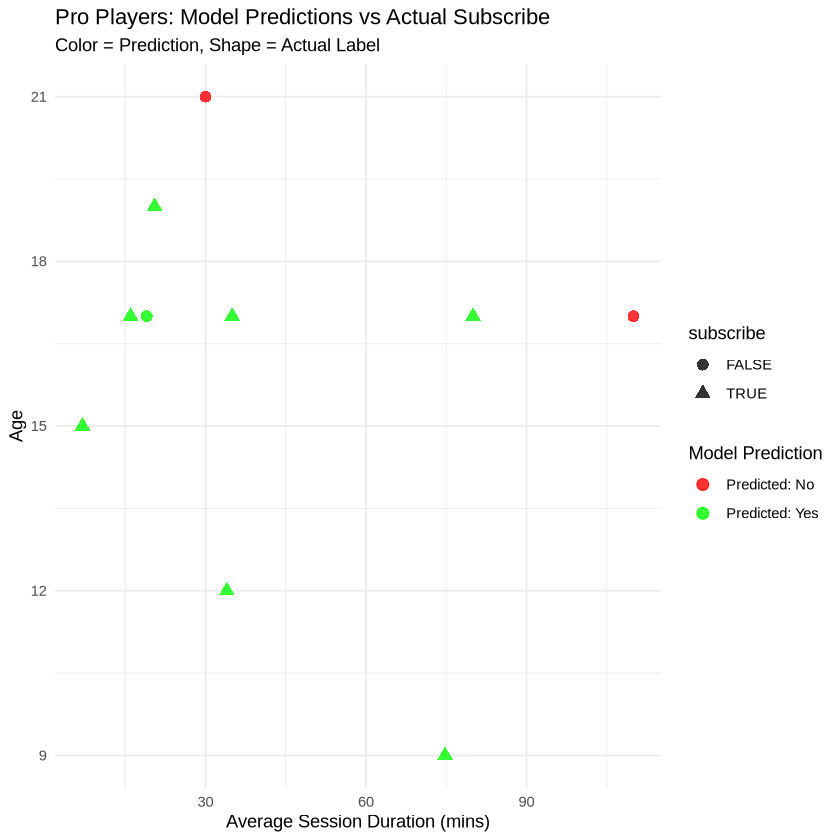

In [34]:
pro_preds_full <- predict(knn_fit, new_data = pro_data) %>%
  bind_cols(pro_data)
ggplot(pro_preds_full, aes(x = avg_session_duration, y = Age)) +
  geom_point(aes(
    color = .pred_class,    # model prediction
    shape = subscribe       # actual label
  ), size = 3, alpha = 0.8) +
  scale_color_manual(
    values = c("red", "green"),
    labels = c("Predicted: No", "Predicted: Yes"),
    name = "Model Prediction"
  ) +
  labs(
    title = "Pro Players: Model Predictions vs Actual Subscribe",
    subtitle = "Color = Prediction, Shape = Actual Label",
    x = "Average Session Duration (mins)",
    y = "Age"
  ) +
  theme_minimal()
